# Reproducing Position Bias Curves and Plots in the Paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import beta
from scipy.stats import yulesimon, zipf

In [2]:
import matplotlib as mpl
new_rc_params = {'text.usetex': True,
    'svg.fonttype': 'none',
    'font.family': 'Linux Libertine',
    'text.latex.preamble': r'\usepackage{libertine}',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'libertine',
    'mathtext.it': 'libertine:italic',
    'mathtext.bf': 'libertine:bold'
    }
mpl.rcParams.update(new_rc_params)
plt.style.use('tableau-colorblind10')
plt.rc('axes', axisbelow=True)

In [3]:
# Taken from
# https://gist.github.com/AndiH/c957b4d769e628f506bd

# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
    
linestyles=['-', '--', (0, (5, 10)), '-.', ':']

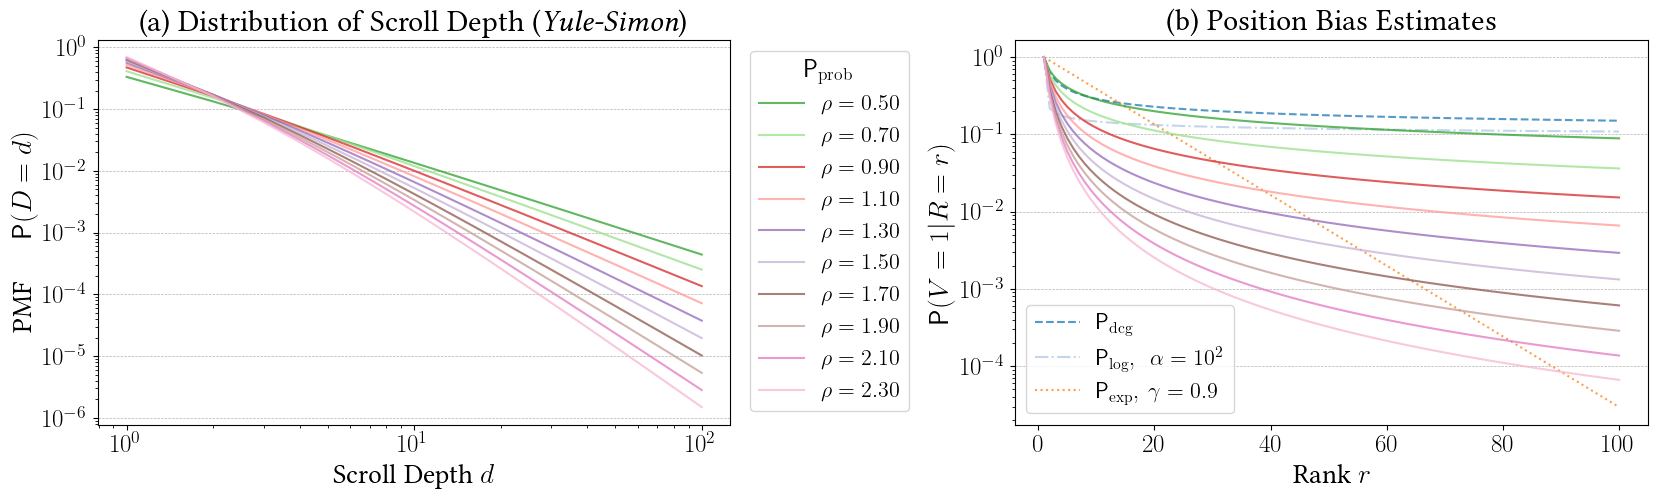

In [4]:
figsize=(20,5)
fontsize=22

fig, axes = plt.subplots(1, 2, figsize=figsize,gridspec_kw={'width_ratios': [1, 1], 'wspace': .45})

axes[0].set_title(r'(a) Distribution of Scroll Depth (\textit{Yule-Simon})', fontsize=fontsize)
cycler = plt.cycler(
                    color=tableau20[4:]
)
axes[0].set_prop_cycle(cycler)  

x = np.arange(1, 101)

rhos = np.linspace(0.5, 2.3, 10)

for rho in rhos:
    axes[0].loglog(x, yulesimon.pmf(x, rho), label=fr'$\rho={rho:.2f}$', alpha=.75)

axes[0].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
axes[0].set_xlabel(r'Scroll Depth $d$', fontsize=fontsize-2)
axes[0].set_ylabel(r'PMF $\ \ \ \ \ \mathsf{P}(D=d)$', fontsize=fontsize-2)

for tick in axes[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize - 4) 
for tick in axes[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize - 4) 

axes[0].legend(title=r'$\mathsf{P}_{\rm prob}$', loc='upper right', bbox_to_anchor=(1.3, 1.), title_fontsize=fontsize-4, fontsize=fontsize-6)

axes[1].set_title(r'(b) Position Bias Estimates', fontsize=fontsize)
cycler = plt.cycler(
                    color=tableau20[:3] + tableau20[4:]
)

axes[1].set_prop_cycle(cycler)  

# DCG
y = 1 / np.log2(x + 1)
axes[1].plot(x, y, label=r'$\mathsf{P}_{\rm dcg}$', alpha=.75, ls = '--')

# Log
y = 1 / np.log(np.e + 100 * (x-1))
axes[1].plot(x, y, label=r'$\mathsf{P}_{\rm log}, \ \  \alpha=10^{2}$', alpha=.75, ls = '-.')

# Exp
y = .9 ** (x-1)
axes[1].plot(x, y, label=r'$\mathsf{P}_{\rm exp}, \ \gamma=0.9$', alpha=.75, ls=':')
axes[1].legend(loc='lower left', bbox_to_anchor=(0., 0.), title_fontsize=fontsize-4, fontsize=fontsize-6)

for rho in rhos:
    y = (x) * beta(x, rho+1)
    y = np.insert(y[:-1], 0, 1)

    axes[1].plot(x, y, label=r'$\mathsf{P}_{\rm prob}'+fr', \rho={rho:.2f}$', alpha=.75)   

axes[1].set_yscale('log')
axes[1].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
axes[1].set_xlabel('Rank $r$', fontsize=fontsize-2)
axes[1].set_ylabel(r'$\mathsf{P}(V=1|R=r)$', fontsize=fontsize-2)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize - 4) 
for tick in axes[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize - 4) 

# plt.savefig('RecSys_Short_Fig1.pdf', transparent=True, bbox_inches='tight')
plt.show()